In [38]:
import sys; sys.path.append('/rds/general/user/cb2714/home/'); from wwa import *

cproj = cartopy.crs.PlateCarree()

- [x] Check duration of Libya precip
- [x] composite of storm trajectory (MSWX / ERA5)
- [x] map of daily precip with affected regions marked
- [ ] return level map for whole region
- [ ] return periods of daily precip in each region

Elevation data from https://download.gebco.net/

In [2]:
# ! module load rclone; rclone sync -v --drive-shared-with-me mswep:/MSWEP_V280/NRT/3hourly /rds/general/project/wwa/ephemeral/mswep_3hrly_nrt

In [3]:
pr = wrap_lon(xr.concat([xr.open_mfdataset("../00_WWA_project_folder/ephemeral/mswep_3hrly_nrt/2023"+str(d)+"*.nc") for d in range(244,255)], "time")).sel(lon = slice(-10, 30), lat = slice(30, 45))
pr.to_netcdf("data/mswep_2023-09_3hr.nc")

In [9]:
pr = wrap_lon(xr.open_mfdataset("../00_WWA_project_folder/ephemeral/mswep_3hrly_nrt/2023*.nc")).sel(lon = slice(-10, 30), lat = slice(30, 45))
pr.to_netcdf("data/mswep_2023-3hr.nc")

---
# **Synoptic meteorology**

## **z500 + precip**

In [127]:
pr = xr.open_dataset("data/era5_tp_daily_eu_extended_-20-40E_30-60N.nc").sel(time = slice("2023-09-01", "2023-09-12")).tp.rename(lat = "latitude", lon = "longitude")
z500 = xr.open_dataset("data/era5_z500_daily_eu_extended_-20-40E_30-60N.nc").sel(time = slice("2023-09-01", "2023-09-12")).z500.rename(lat = "latitude", lon = "longitude") / 98
mproj = cartopy.crs.LambertConformal(central_longitude=0, central_latitude=55)

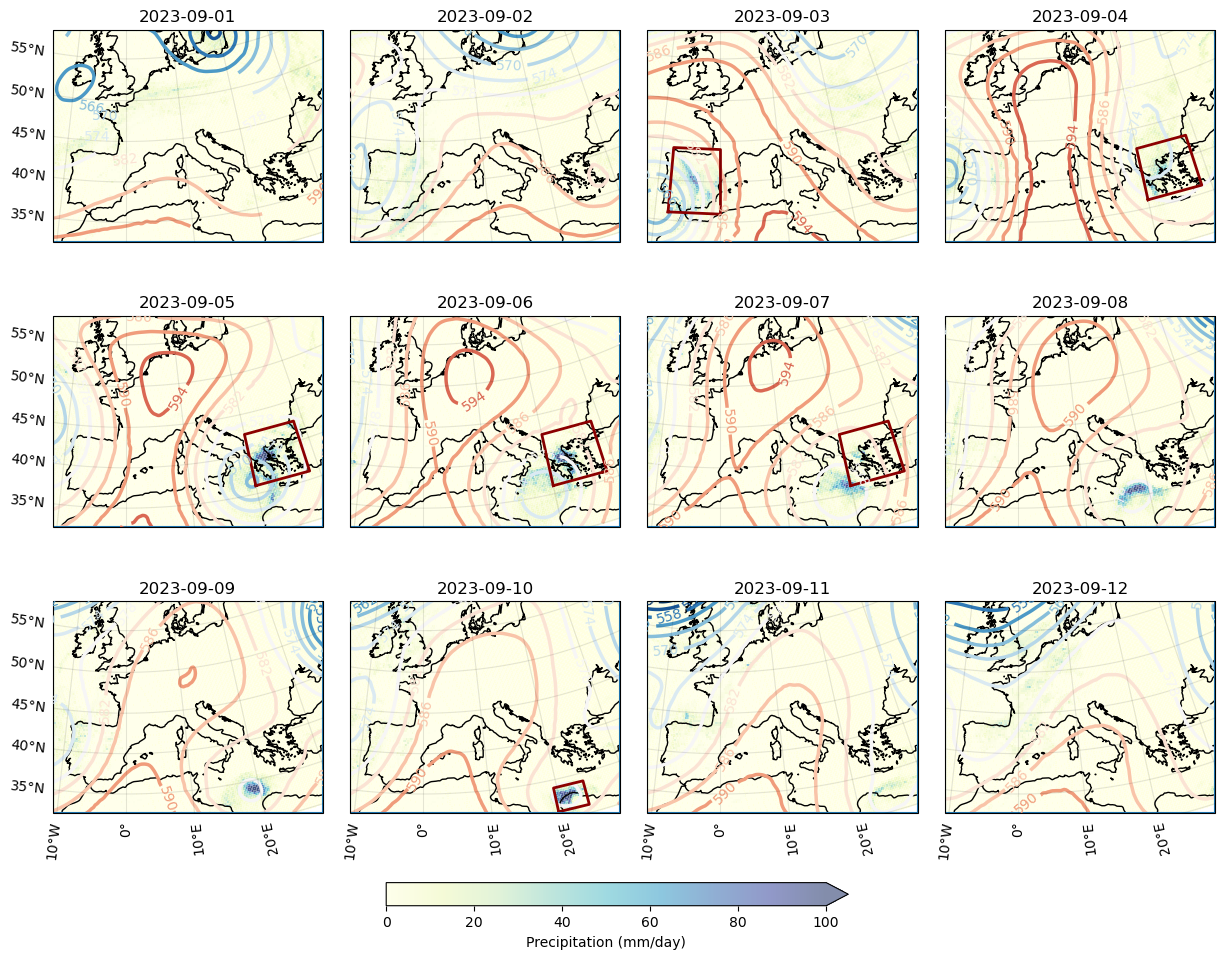

In [16]:
z500_levels = range(5500,6100,25) # in m
z500_levels = range(550,610,4) # in dm
# extent = [-2.5e6,1e6,,]

fig, axs = plt.subplots(ncols = 4, nrows = 3, figsize = (15,12), dpi = 100, subplot_kw = {"projection" : mproj}, sharex = True, sharey = True)
pr_kwargs = {"cmap" : "YlGnBu", "vmin" : 0, "vmax" : 100, "add_colorbar" : False}
plt.subplots_adjust(wspace = 0.1, hspace = 0.1)

for i in range(12):
    
    ax = fig.axes[i]
    
    z500_i = z500.isel(time = i)
    pr_i = pr.isel(time = i)
    
    cbar = pr_i.plot(ax = ax, transform = cartopy.crs.PlateCarree(), **pr_kwargs, alpha = 0.5)
    cs = ax.contour(z500_i.longitude, z500_i.latitude, z500_i, cmap = "RdBu_r", transform = cproj, linewidths = 2.5,
                    levels = z500_levels)
    ax.clabel(cs)

    ax.set_title(pr_i.time.dt.date.values)
    ax.coastlines()
    ax.gridlines(crs = cproj, color = "k", alpha = 0.1, draw_labels = False)

#     gl = ax.gridlines(, draw_labels=True, x_inline=False, y_inline=False, linewidth=0.33, color='k',alpha=0.5)
#     gl.right_labels = gl.top_labels = False
#     gl.ylocator = ticker.FixedLocator([25,30,35,40, 45, 50])
#     gl.xlocator = ticker.FixedLocator([-100, -95, -90, -85, -80, -75, -70])
    
    # add box around area of interest
    if i in [2]:
        xn, xx, yn, yx = [-8,0,36,44] # spain
    elif i in range(3,7): 
        xn, xx, yn, yx = [20,28.5,36,42.5]
    elif i in [9]: 
        xn, xx, yn, yx = [19.5,24,31,34]
    else:
        xn, xx, yn, yx = np.repeat(np.nan, 4)
    ax.plot([xn,xn,xx,xx,xn], [yn,yx,yx,yn,yn], color = "darkred", lw = 2, transform = cproj)
    [ax.axhline(x) for x in [-2.5e6,0.4e6]]
    [ax.axvline(x) for x in [-1e6,2.7e6]]
    
    ax.set_extent([-1e6,2.7e6,-2.5e6,0.4e6], crs = mproj)
    
for ax in axs[:,0]: ax.gridlines(color = "k", alpha = 0, draw_labels = ["left"], x_inline=False, y_inline=False)
for ax in axs[-1,:]: ax.gridlines(color = "k", alpha = 0, draw_labels = ["bottom"], x_inline=False, y_inline=False)

plt.colorbar(cbar, ax = axs, extend = "max", location = "bottom", fraction = 0.025, pad = 0.075, label = "Precipitation (mm/day)")
    
plt.savefig("fig/event_synoptic_era5-daily-z500-precip_LC.png")

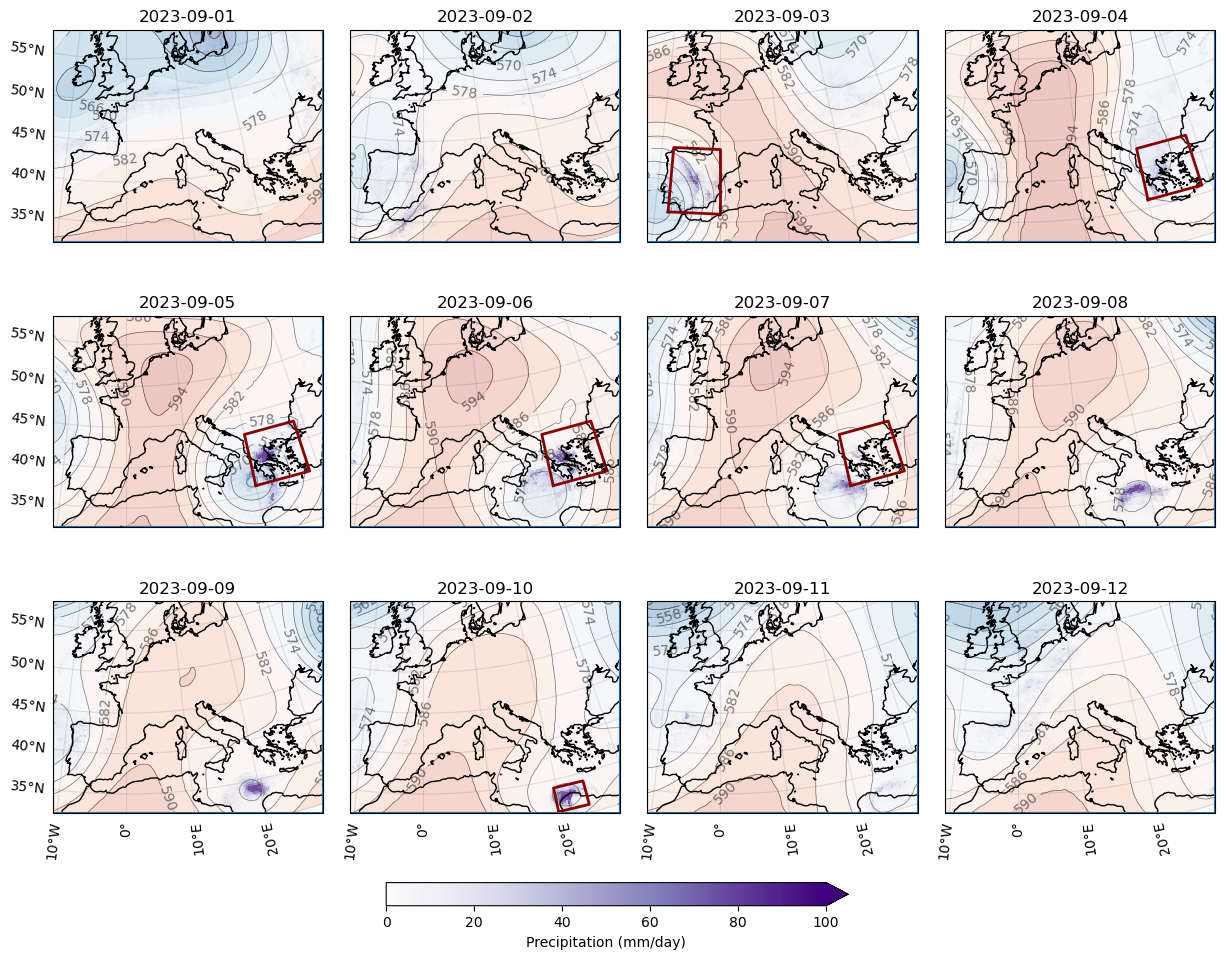

In [130]:
z500_levels = range(5500,6100,25) # in m
z500_levels = range(550,610,4) # in dm
# extent = [-2.5e6,1e6,,]

fig, axs = plt.subplots(ncols = 4, nrows = 3, figsize = (15,12), dpi = 100, subplot_kw = {"projection" : mproj}, sharex = True, sharey = True)
pr_kwargs = {"cmap" : "Purples", "vmin" : 0, "vmax" : 100, "add_colorbar" : False}
plt.subplots_adjust(wspace = 0.1, hspace = 0.1)

for i in range(12):
    
    ax = fig.axes[i]
    
    z500_i = z500.isel(time = i)
    pr_i = pr.isel(time = i)
    
    cbar = pr_i.plot(ax = ax, transform = cartopy.crs.PlateCarree(), **pr_kwargs)
    ax.contourf(z500_i.longitude, z500_i.latitude, z500_i, cmap = "RdBu_r", transform = cproj, levels = z500_levels, alpha = 0.3)
    cs = ax.contour(z500_i.longitude, z500_i.latitude, z500_i, transform = cproj, levels = z500_levels, colors = "k", alpha = 0.5, linewidths = 0.5)
    ax.clabel(cs, levels = z500_levels)
#     ax.contour(z500_i.longitude, z500_i.latitude, z500_i, transform = cproj, levels = z500_levels, colors = "k", alpha = 0.5, linewidths = 0.5)

    ax.set_title(pr_i.time.dt.date.values)
    ax.coastlines()
    ax.gridlines(crs = cproj, color = "k", alpha = 0.1, draw_labels = False)
    
    # add box around area of interest
    if i in [2]:
        xn, xx, yn, yx = [-8,0,36,44] # spain
    elif i in range(3,7): 
        xn, xx, yn, yx = [20,28.5,36,42.5]
    elif i in [9]: 
        xn, xx, yn, yx = [19.5,24,31,34]
    else:
        xn, xx, yn, yx = np.repeat(np.nan, 4)
    ax.plot([xn,xn,xx,xx,xn], [yn,yx,yx,yn,yn], color = "darkred", lw = 2, transform = cproj)
    [ax.axhline(x) for x in [-2.5e6,0.4e6]]
    [ax.axvline(x) for x in [-1e6,2.7e6]]
    
    ax.set_extent([-1e6,2.7e6,-2.5e6,0.4e6], crs = mproj)
    
for ax in axs[:,0]: ax.gridlines(color = "k", alpha = 0, draw_labels = ["left"], x_inline=False, y_inline=False)
for ax in axs[-1,:]: ax.gridlines(color = "k", alpha = 0, draw_labels = ["bottom"], x_inline=False, y_inline=False)

plt.colorbar(cbar, ax = axs, extend = "max", location = "bottom", fraction = 0.025, pad = 0.075, label = "Precipitation (mm/day)")
    
plt.savefig("fig/event_synoptic_era5-daily-z500_LC.png")

---
# **MSLP - preliminary**

In [121]:
ds = xr.open_dataset("data/era5_msl_daily_eu_extended_-10-40E_30-52N.nc").sel(time = slice("2023-09-01", "2023-09-12"))
ds["msl"] = convert_units_to(ds.msl, "hPa")
ds = ds.rename(lat = "latitude", lon = "longitude")

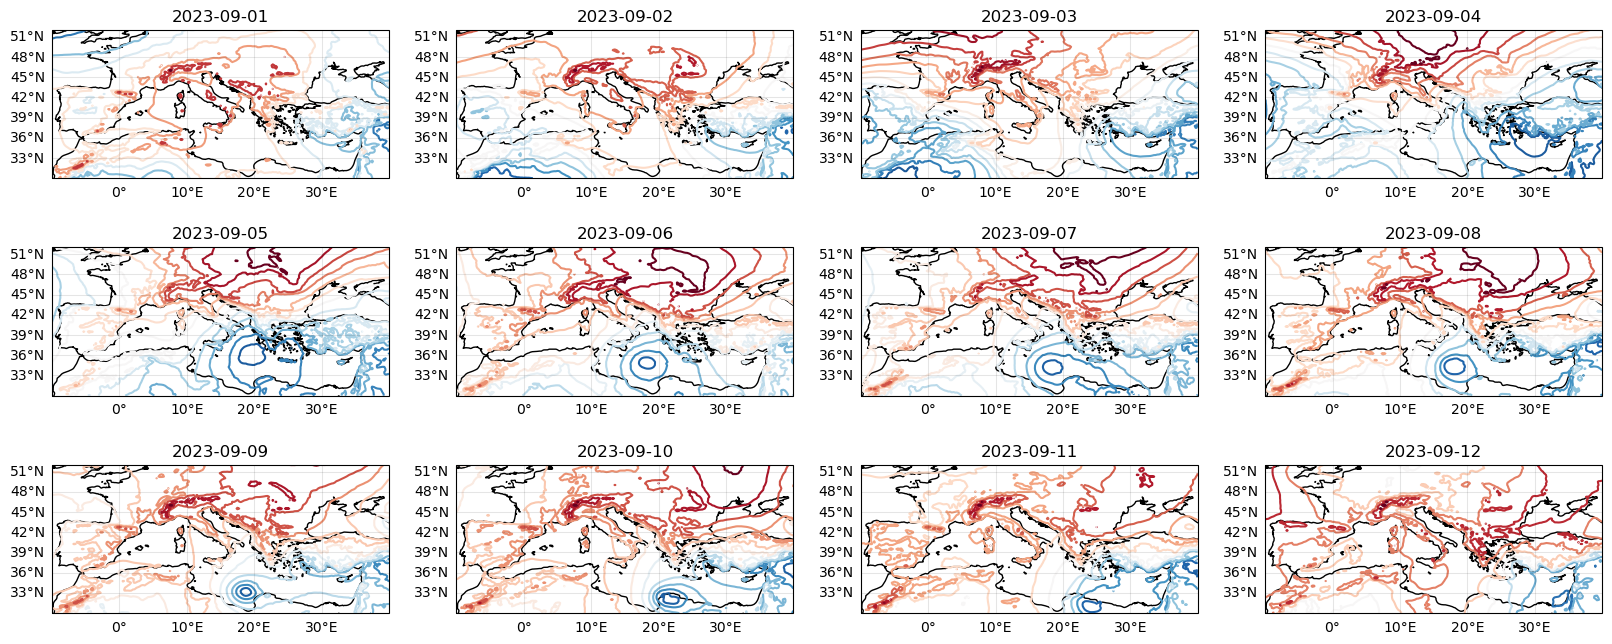

In [125]:
fig, axs = plt.subplots(ncols = 4, nrows = 3, figsize = (20,8), dpi = 100, subplot_kw = {"projection" : cproj})

for i in range(12):
    
    ax = fig.axes[i]
    
    ds_i = ds.isel(time = i)
    
    # ds_i.sfcWind.plot(ax = ax)
    cst = 2
    cs = ax.contour(ds.longitude, ds.latitude, ds_i.msl, cmap = "RdBu_r", levels = range(int(np.floor(ds_i.msl.min())), int(np.ceil(ds_i.msl.max())), cst))
    # ax.clabel(cs)
    
#     st=5
#     ax.quiver(ds.longitude[::st], ds.latitude[::st], ds_i.u10[::st,::st], ds_i.v10[::st,::st], alpha = 0.5)
    ax.set_title(ds_i.time.dt.date.values)
    
    ax.coastlines()
#     sf.boundary.plot(ax = ax, color = "red", lw = 1)
    ax.gridlines(color = "k", alpha = 0.1, draw_labels = ["bottom", "left"])
    
#     plt.suptitle("Daily mean windspeed. Red dots indicate the track of Hurricane Dora at 3-hourly intervals", fontweight = "bold", y = 0.925)
plt.savefig("fig/event_synoptic_era5-daily.png")

---
# **Short-term precipitation over individual regions**

In [2]:
# define regions of interest
era5 = wrap_lon(xr.open_dataset("data/era5_tp_daily_eu_extended_-20-40E_30-60N.nc")).tp.sel(time = "2023")

boxes = {"greece" : [21,24,38.5,40.5], "libya" : [20,23,32,33], "spain" : [-5.5,-3.5,39,41]}
large_boxes = {"greece" : [20,28.5,35,43], "libya" : [18,26.5,30,38], "spain" : [-7.5,1,36,44]}
vmaxes = [80,150,100,150]
titles = ["(a) Spain (Sep 3rd)", "(b) Greece (Sep 5th-6th)", "(c) Greece (Sep 4th-7th)", "(d) Libya (Sep 10th)"]

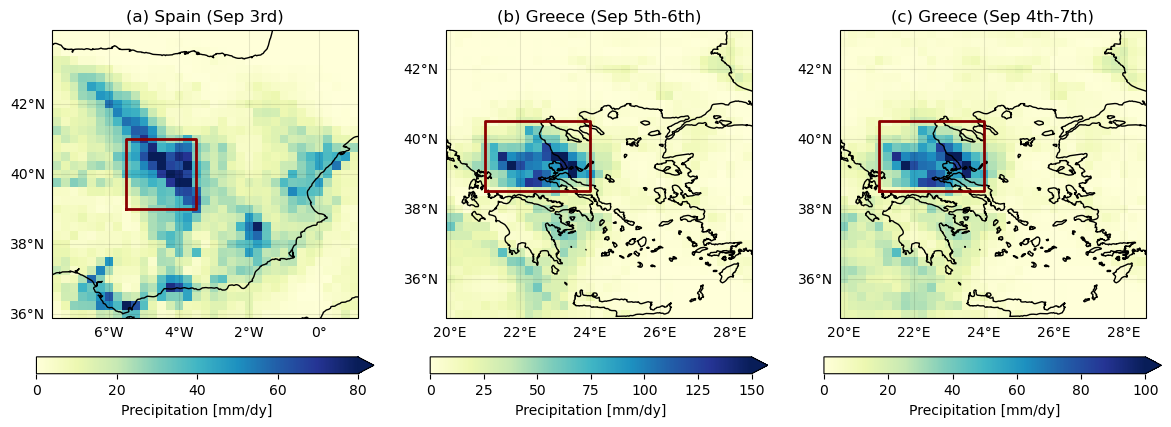

In [3]:
fig, axs = plt.subplots(ncols = 3, figsize = (15,5), dpi = 100, subplot_kw = {"projection" : cproj})
fig.subplots_adjust(wspace = 0.05)
plot_kwargs = {"cmap" : "YlGnBu", "vmin" : 0, "cbar_kwargs" : {"location" : "bottom", "pad" : 0.1, "shrink" : 0.9}}

for i in range(3):
    
    region = ["spain", "greece", "greece", "libya"][i]
    xn, xx, yn, yx = large_boxes[region]
    
    nd = [1,2,4,1][i]
    ax = axs[i]
        
    pr = era5.sel(lon = slice(xn,xx), lat = slice(yn,yx)).rolling(time = nd).mean()
    pr = pr.where(pr >= 0, 0) # stupid rounding error
    
    xn, xx, yn, yx = boxes[region]
    prmax_time = pr.sel(lon = slice(xn,xx), lat = slice(yn,yx)).mean(["lat", "lon"]).idxmax("time")
    pr.sel(time = prmax_time).plot(ax = ax, vmax = vmaxes[i], **plot_kwargs)
    
    ax.coastlines()
    ax.plot([xn,xn,xx,xx,xn], [yn,yx,yx,yn,yn], color = "darkred", lw = 2)
    ax.gridlines(color = "k", alpha = 0.1, draw_labels = ["bottom", "left"], xlocs = range(-8,29,2), ylocs = range(30,44,2))
    ax.set_title(titles[i])
    
plt.savefig("fig/event_local-precip_era5")

## **Spain**

In [133]:
xn, xx, yn, yx = [-8,2,36,44] 
sites = ["Madrid", "Toledo", "Alcanar", "Cadiz", "Tarragona", "Castello"]

px = {s : get_latlon(s) for s in sites}
mswep = xr.open_dataset("data/mswep_2023-09_3hr.nc").sel(lon = slice(xn, xx), lat = slice(yn, yx), time = "2023-09-03").precipitation
era5 = wrap_lon(xr.open_dataset("data/era5_tp_daily_eu_extended_-20-40E_30-60N.nc")).tp.sel(lon = slice(xn, xx), lat = slice(yn, yx), time = "2023-09-03")
# elev = xr.open_dataset("data/gebco_2023_n37.0_s30.0_w18.0_e28.0.nc").elevation

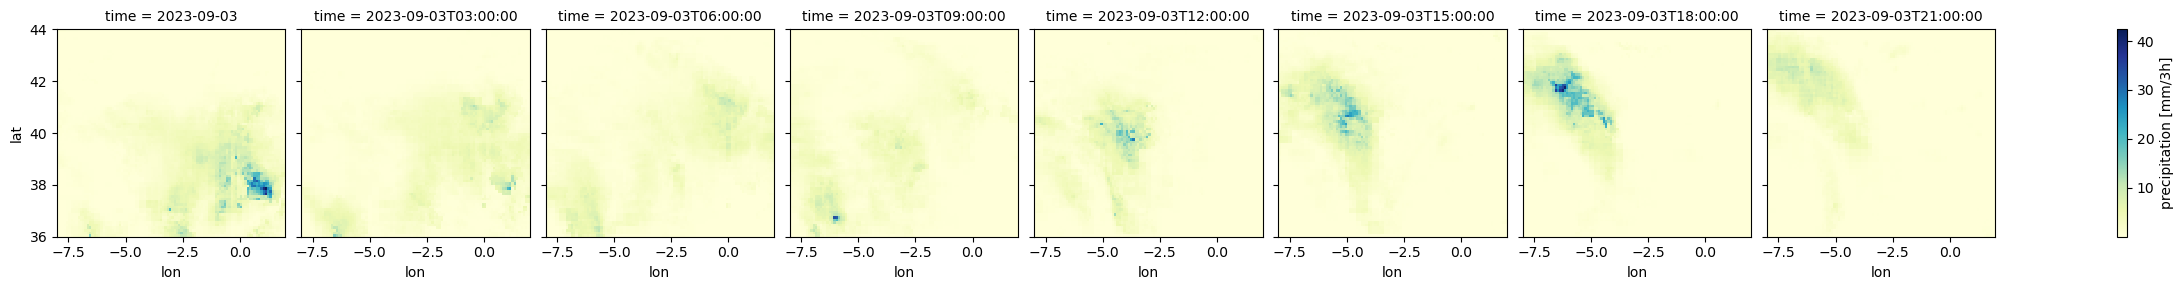

In [134]:
mswep.plot(col = "time", cmap = "YlGnBu")

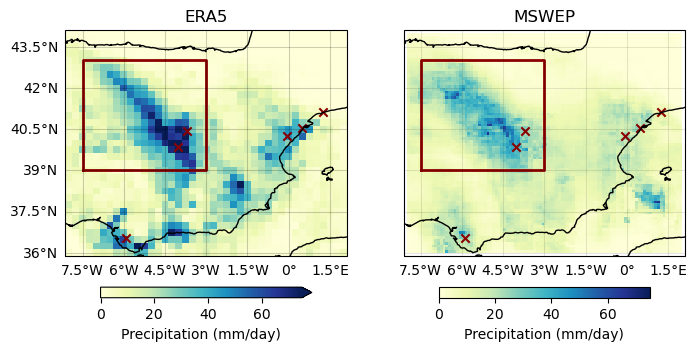

In [135]:
fig, axs = plt.subplots(ncols = 2, figsize = (8,4), dpi = 100, subplot_kw = {"projection" : cproj}, sharex = True, sharey = True)
plot_kws = {"cmap" : "YlGnBu", "vmin" : 0, "vmax" : 75}
cbar_kwargs = {"location" : "bottom", "shrink" : 0.75, "pad" : 0.1}

# elev.plot(ax = axs[0], cmap = "terrain", vmin = -250, vmax = 1000, cbar_kwargs = cbar_kwargs | {"label" : "Elevation (m above sea level)"})
# axs[0].set_title("Elevation")

era5.plot(ax = axs[0], **plot_kws, cbar_kwargs = cbar_kwargs | {"label" : "Precipitation (mm/day)"})
axs[0].set_title("ERA5")
mswep.sum("time").plot(ax = axs[1], **plot_kws, cbar_kwargs = cbar_kwargs | {"label" : "Precipitation (mm/day)"})
axs[1].set_title("MSWEP")

for ax in axs: 
    ax.coastlines()
    ax.gridlines(color = "k", alpha = 0.1, draw_labels = ["bottom"])
    [ax.scatter(v["lon"], v["lat"], marker = "x", color = "darkred") for v in px.values()]
    
    xn, xx, yn, yx = [-7.5,-3,39,43] 
    ax.plot([xn,xn,xx,xx,xn], [yn,yx,yx,yn,yn], color = "darkred", lw = 2)
    
axs[0].gridlines(color = "k", alpha = 0.1, draw_labels = ["left"])
plt.savefig("fig/event_spain.png")

## **Libya**

In [43]:
xn, xx, yn, yx = [18,28,30,37]
sites = ["Derna", "Derna Dam"]

px = {s : get_latlon(s) for s in sites}
mswep = xr.open_dataset("data/mswep_2023-09_3hr.nc").sel(lon = slice(xn, xx), lat = slice(yn, yx), time = slice("2023-09-10", "2023-09-11T09:00")).precipitation
era5 = wrap_lon(xr.open_dataset("data/era5_tp_daily_eu_extended_-20-40E_30-60N.nc")).tp.sel(lon = slice(xn, xx), lat = slice(yn, yx), time = slice("2023-09-10", None))
elev = xr.open_dataset("data/gebco_2023_n37.0_s30.0_w18.0_e28.0.nc").elevation

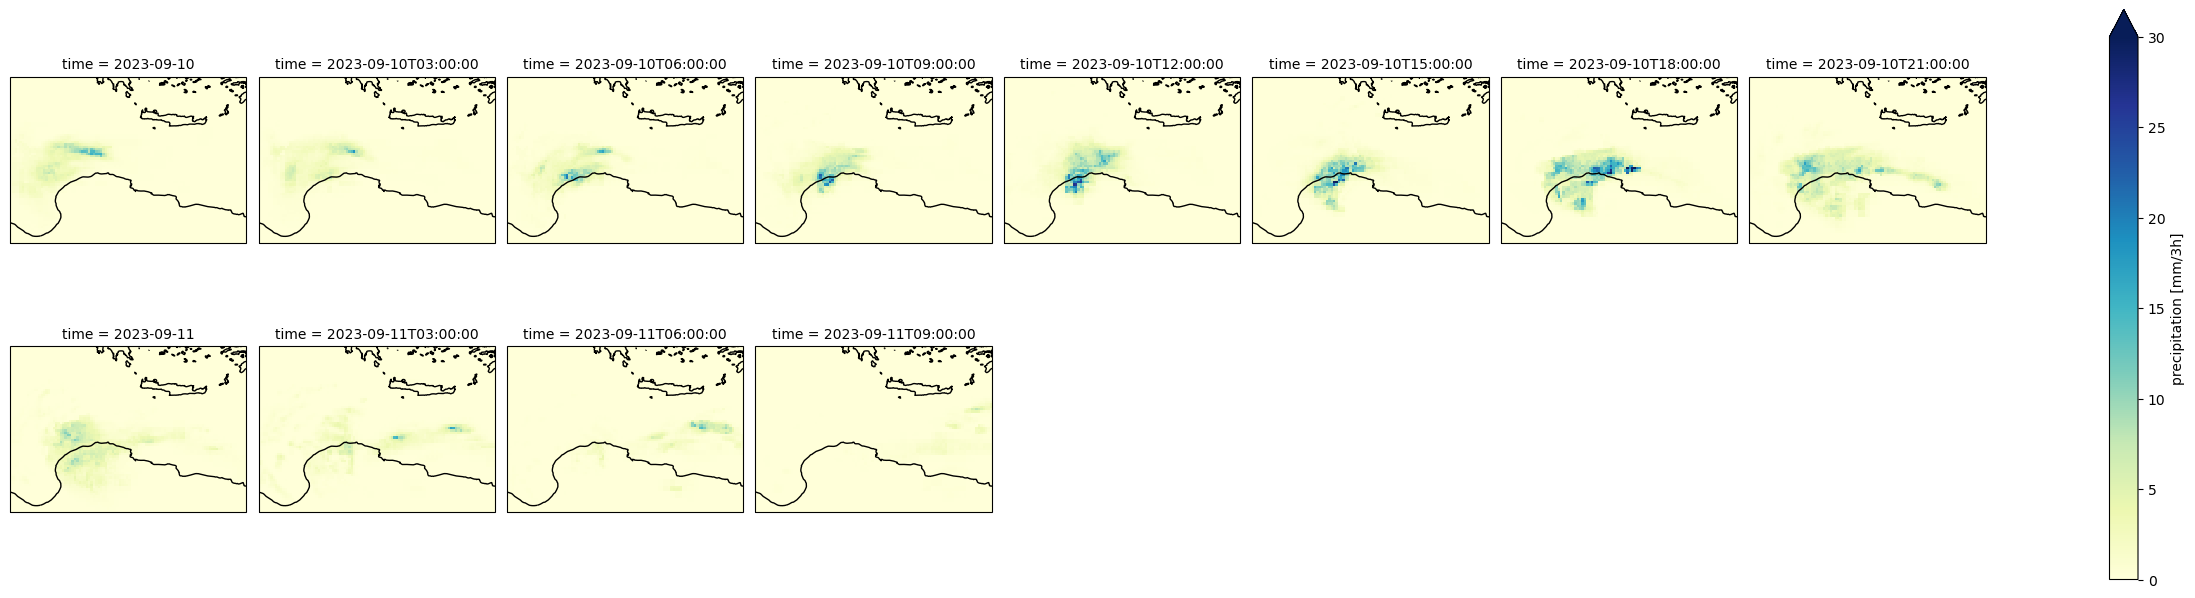

In [44]:
mswep.plot(col = "time", col_wrap = 8, vmax = 30, cmap = "YlGnBu", subplot_kws = {"projection" : cproj, "extent" : [xn,xx,yn,yx]})
for ax in plt.gcf().axes[:-1]:
    ax.coastlines()

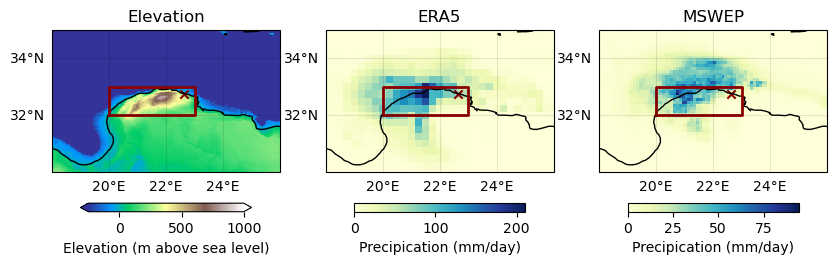

In [45]:
fig, axs = plt.subplots(ncols = 3, figsize = (10,4), dpi = 100, subplot_kw = {"projection" : cproj, "extent" : [18,26,30,35]}, sharex = True, sharey = True)
plot_kws = {"cmap" : "YlGnBu", "vmin" : 0}
cbar_kwargs = {"location" : "bottom", "shrink" : 0.75, "pad" : 0.1}

elev.plot(ax = axs[0], cmap = "terrain", vmin = -250, vmax = 1000, cbar_kwargs = cbar_kwargs | {"label" : "Elevation (m above sea level)"})
axs[0].set_title("Elevation")

era5.sel(time = "2023-09-10").plot(ax = axs[1], **plot_kws, cbar_kwargs = cbar_kwargs | {"label" : "Precipication (mm/day)"})
axs[1].set_title("ERA5")
mswep.sel(time = "2023-09-10").sum("time").plot(ax = axs[2], **plot_kws, cbar_kwargs = cbar_kwargs | {"label" : "Precipication (mm/day)"})
axs[2].set_title("MSWEP")

for ax in axs: 
    ax.coastlines()
    ax.gridlines(color = "k", alpha = 0.1, draw_labels = ["bottom", "left"], xlocs = range(18,30,2), ylocs = range(30,38,2))
    [ax.scatter(v["lon"], v["lat"], marker = "x", color = "darkred") for v in px.values()]
    
    xn, xx, yn, yx = [20,23,32,33] 
    ax.plot([xn,xn,xx,xx,xn], [yn,yx,yx,yn,yn], color = "darkred", lw = 2)
    
plt.savefig("fig/event_libya.png")

# **Greece, Bulgaria, Turkey**

In [55]:
sites = ["Volos", "Magnesia", "Tsarevo", "Igneada", "Arapya", "Volos", "Skiathos"]
xn, xx, yn, yx = [20,28.5,36,42.5]

px = {s : get_latlon(s) for s in sites}
mswep = xr.open_dataset("data/mswep_2023-09_3hr.nc").sel(lon = slice(xn, xx), lat = slice(yn, yx), time = slice("2023-09-04", "2023-09-07")).precipitation.resample(time = "D").sum()
era5 = wrap_lon(xr.open_dataset("data/era5_tp_daily_eu_extended_-20-40E_30-60N.nc")).tp.sel(lon = slice(xn, xx), lat = slice(yn, yx), time = slice("2023-09-04", "2023-09-07"))

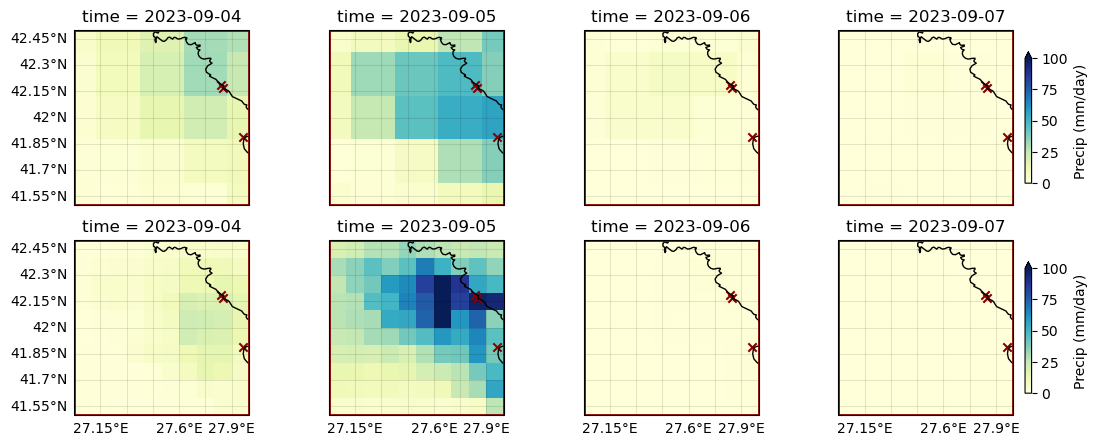

In [57]:
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize = (15,5), dpi = 100, subplot_kw = {"projection" : cproj, "extent" : [xn,xx,yn,yx]}, sharex = True, sharey = True)
plot_kws = {"cmap" : "YlGnBu", "vmin" : 0, "add_colorbar" : False}
cbar_kwargs = {"location" : "right", "shrink" : 0.75, "pad" : 0.01, "extend" : "max"}

for i in range(4):
    era5_cbar = era5.isel(time = i).plot(ax = axs[0,i], vmax = 100, **plot_kws)
    mswep_cbar = mswep.isel(time = i).plot(ax = axs[1,i], vmax = 100, **plot_kws)
    
for ax in plt.gcf().axes:
    ax.coastlines()
    [ax.scatter(v["lon"], v["lat"], marker = "x", color = "darkred") for v in px.values()]
    ax.gridlines(color = "k", alpha = 0.1, draw_labels = False)
    
    xn, xx, yn, yx = [21,24,38.5,40.5]
    ax.plot([xn,xn,xx,xx,xn], [yn,yx,yx,yn,yn], color = "darkred", lw = 2)
    
    xn, xx, yn, yx = [27,28,41.5,42.5]
    ax.plot([xn,xn,xx,xx,xn], [yn,yx,yx,yn,yn], color = "darkred", lw = 2)
    
for ax in axs[:,0]: ax.gridlines(color = "k", alpha = 0, draw_labels = ["left"])
for ax in axs[-1,:]: ax.gridlines(color = "k", alpha = 0, draw_labels = ["bottom"])
    
plt.colorbar(era5_cbar, ax = axs[0,:], label = "Precip (mm/day)", **cbar_kwargs)
plt.colorbar(mswep_cbar, ax = axs[1,:], label = "Precip (mm/day)", **cbar_kwargs)

In [49]:
sites = ["Tsarevo", "Igneada", "Arapya"]
xn, xx, yn, yx = [27,28,41.5,42.5]

px = {s : get_latlon(s) for s in sites}
mswep = xr.open_dataset("data/mswep_2023-09_3hr.nc").sel(lon = slice(xn, xx), lat = slice(yn, yx), time = "2023-09-05").precipitation

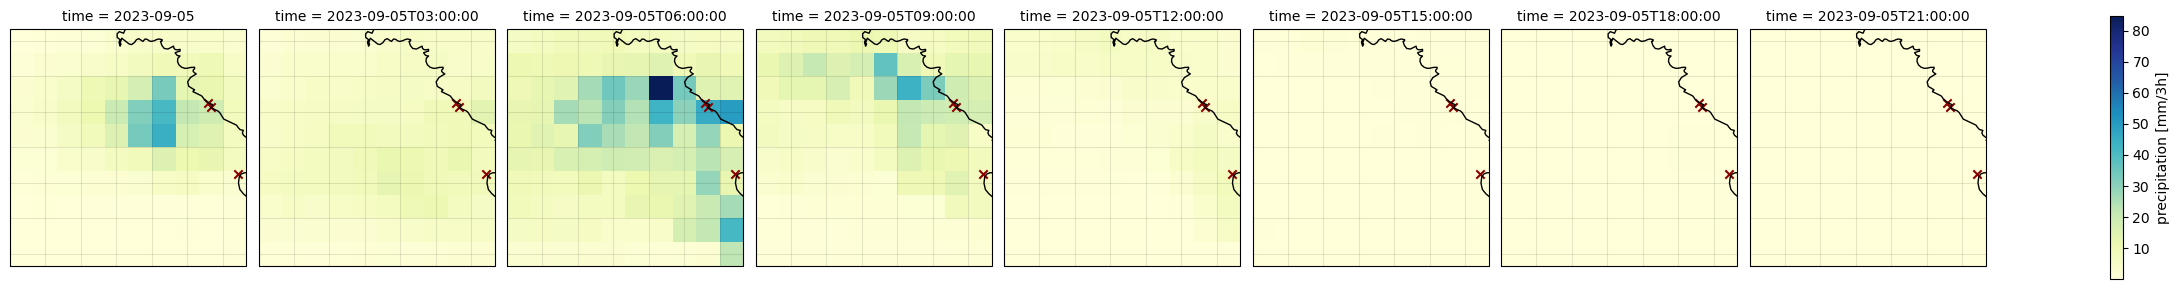

In [50]:
mswep.plot(col = "time", col_wrap = 8, cmap = "YlGnBu", subplot_kws = {"projection" : cproj})
for ax in plt.gcf().axes[:-1]:
    ax.coastlines()
    [ax.scatter(v["lon"], v["lat"], marker = "x", color = "darkred") for v in px.values()]
    ax.gridlines(color = "k", alpha = 0.1, draw_labels = False)

### **Rxnday for return period maps**

In [129]:
xn, xx, yn, yx = [20,28.5,36,42.5]
era5 = wrap_lon(xr.open_dataset("data/era5_tp_daily_eu_extended_-20-40E_30-60N.nc")).tp.sel(lon = slice(xn, xx), lat = slice(yn, yx))
rm = regionmask.defined_regions.natural_earth_v5_0_0.land_110.mask(era5.lon, era5.lat)
era5 = era5.where(rm == 0)

In [130]:
for i in [1,2,4]:
    
    era5_nday = era5.rolling(time = i, center = False).sum()
    era5_rxnday = era5_nday.resample(time = "AS-JAN").max()
    
    # replace grid cell maximum with Storm Daniel
    t = ["2023-09-05", "2023-09-06", "2023-09-06", "2023-09-07"][i-1]
    era5_rxnday = xr.concat([era5_rxnday.sel(time = slice(None, "2022")), era5_nday.sel(time = t)], "time")
    era5_rxnday.to_netcdf("ts/greece_rx"+str(i)+"day_era5.nc")
    era5_rxnday.assign_coords(time = era5_rxnday.time.dt.year).stack(xy = ["lat", "lon"]).to_pandas().to_csv("ts/sr-flattened_rx"+str(i)+"day_era5.csv")

## **Get all time series**

In [ ]:
eobs = wrap_lon(xr.open_mfdataset("../00_WWA_project_folder/live/data/e-obs/rr*.nc")).rr.rename(latitude = "lat", longitude = "lon")
era5 = wrap_lon(xr.open_dataset("data/era5_tp_daily_eu_extended_-20-40E_30-60N.nc")).tp

# mask ERA5 to land only (E-Obs is already land only)
rm = regionmask.defined_regions.natural_earth_v5_0_0.land_110.mask(era5.lon, era5.lat)
era5 = era5.where(rm == 0)

# define regions of interest
boxes = {"greece" : [21,24,38.5,40.5], "bulgaria" : [27,28,41.5,42.5], "libya" : [20,23,32,33], "spain" : [-5.5,-3.5,39,41], "sr" : [20,28.5,36,42.5]}

In [7]:
xn, xx, yn, yx = boxes["libya"]
era5_libya = era5.sel(lon = slice(xn, xx), lat = slice(yn, yx)).mean(["lat", "lon"])

In [42]:
era5_libya.to_dataframe().to_csv("data/era5_libya_daily.csv")
rx1jj_libya = era5_libya.resample(time = "AS-JUL").max()
rx1jj_libya.assign_coords(time = rx1jj_libya.time.dt.year).rename(time = "year").to_dataframe().to_csv("data/era5_libya_rx1day-jj.csv")

In [23]:
boxes = {"greece" : [21,24,38.5,40.5], "bulgaria" : [27,28,41.5,42.5], "libya" : [20,23,32,33], "spain" : [-5.5,-3.5,39,41], "sr" : [20,28.5,36,42.5]}
xn, xx, yn, yx = boxes["libya"]

era5 = xr.open_dataset("data/era5_tp_daily_eu_extended_-20-40E_30-60N.nc").tp
lsm = xr.open_dataset("../00_WWA_project_folder/live/data/era5_lsm_025.nc").lsm.squeeze(drop = True).rename(latitude = "lat", longitude = "lon")
era5 = wrap_lon(era5).where(lsm >= 0.5).sel(lon = slice(xn, xx), lat = slice(yn, yx))

In [28]:
era5.sel(time = "2023-09-10").plot(subplot_kws = {"projection" : cproj, "extent" : boxes["libya"]})
regionmask.defined_regions.natural_earth_v5_0_0.land_110.plot()

In [30]:
era5.mean(["lat", "lon"]).to_netcdf("data/era5-libya-daily.nc")

In [7]:
xn, xx, yn, yx = boxes["libya"]
era5.where(lsm >= 0.5)

KeyboardInterrupt: 

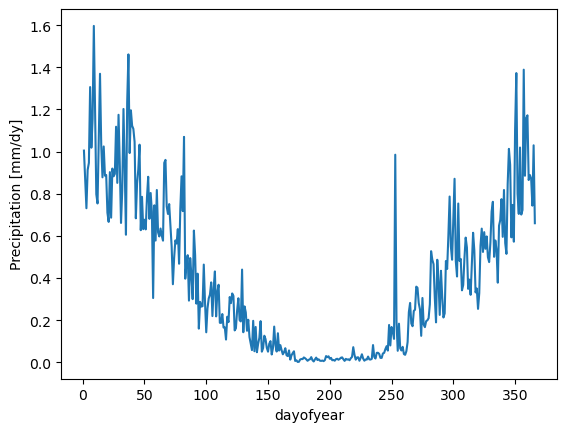

In [11]:
era5_libya.groupby("time.dayofyear").mean().plot()
# era5_libya.sel(time = "2023").groupby("time.dayofyear").mean().plot()

In [23]:
for region in ["greece", "bulgaria", "libya", "spain"]:
    
    xn, xx, yn, yx = boxes[region]
    
    if region == "greece":
        ndays = [1,2,4]
    else:
        ndays = [1]
        
    for ds in ["era5", "eobs"]:
        ts = eval(ds).sel(lon = slice(xn, xx), lat = slice(yn, yx)).mean(["lat", "lon"])
        
        for nd in ndays:
            print(region, nd, ds, ts.sel(time = "2023").rolling(time = nd).sum().idxmax().values)  # check when maximum precip occurred
            rxnday = ts.rolling(time = nd).sum().resample(time = "AS-JAN").max()
            rxnday.assign_coords(time = rxnday.time.dt.year).rename(time = "year").to_pandas().to_csv("ts/"+region+"_rx"+str(nd)+"day_"+ds+".csv")
        

greece 1 era5 2023-09-05T00:00:00.000000000
greece 2 era5 2023-09-06T00:00:00.000000000
greece 4 era5 2023-09-07T00:00:00.000000000
greece 1 eobs 2023-07-01T00:00:00.000000000
greece 2 eobs 2023-09-06T00:00:00.000000000
greece 4 eobs 2023-09-07T00:00:00.000000000
bulgaria 1 era5 2023-03-16T00:00:00.000000000
bulgaria 1 eobs 2023-01-27T00:00:00.000000000
libya 1 era5 2023-09-10T00:00:00.000000000
libya 1 eobs 2023-09-05T00:00:00.000000000


/rds/general/user/cb2714/home/anaconda3/envs/wwa/lib/python3.10/site-packages/dask/array/reductions.py:640: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


spain 1 era5 2023-09-03T00:00:00.000000000
spain 1 eobs 2023-09-03T00:00:00.000000000


### **MSWEP**


In [46]:
# define regions of interest
boxes = {"greece" : [21,24,38.5,40.5], "bulgaria" : [27,28,41.5,42.5], "libya" : [20,23,32,33], "spain" : [-5.5,-3.5,39,41], "sr" : [20,28.5,36,42.5]}

# extract study region for each year (too slow to combine all files at once)
for y in range(1979, 2024):
    
    print(y, datetime.now())
    if len(glob.glob("data/mswep_daily/mswep-daily_*_"+str(y)+".nc")) == len(boxes.keys()): continue

    da = wrap_lon(xr.open_mfdataset("../00_WWA_project_folder/live/data/mswep_*/"+str(y)+"*.nc").precipitation).sel(lon = slice(-7, 28.5), lat = slice(32, 42.5)).load()
    for region in boxes.keys():
        xn, xx, yn, yx = boxes[region]
        da.sel(lon = slice(xn, xx), lat = slice(yn, yx)).to_netcdf("data/mswep_daily/mswep-daily_"+region+"_"+str(y)+".nc")
        
clear_output(wait = False)
print("Done.")

Done.


In [47]:
for region in boxes.keys():
    
    da = xr.open_mfdataset("data/mswep_daily/mswep-daily_"+region+"_*.nc")
    rm = regionmask.defined_regions.natural_earth_v5_0_0.land_10.mask(da.lon, da.lat)
    da = da.where(rm == 0)
    da.to_netcdf("data/mswep_daily_"+region+".nc")

In [48]:
ds = "mswep"
for region in ["greece", "bulgaria", "libya", "spain"]:
        
    if region == "greece":
        ndays = [1,2,4]
    else:
        ndays = [1]
        
    ts = xr.open_dataset("data/mswep_daily_"+region+".nc").precipitation.mean(["lat", "lon"])
    for nd in ndays:
        print(region, nd, ds, ts.sel(time = "2023").rolling(time = nd).sum().idxmax().values)  # check when maximum precip occurred
        rxnday = ts.rolling(time = nd).sum().resample(time = "AS-JAN").max()
        rxnday.assign_coords(time = rxnday.time.dt.year).rename(time = "year").to_pandas().to_csv("ts/"+region+"_rx"+str(nd)+"day_"+ds+".csv")
        

greece 1 mswep 2023-09-05T00:00:00.000000000
greece 2 mswep 2023-09-06T00:00:00.000000000
greece 4 mswep 2023-09-07T00:00:00.000000000
bulgaria 1 mswep 2023-09-05T00:00:00.000000000
libya 1 mswep 2023-09-10T00:00:00.000000000
spain 1 mswep 2023-09-03T00:00:00.000000000


## **Comparison of daily precip**

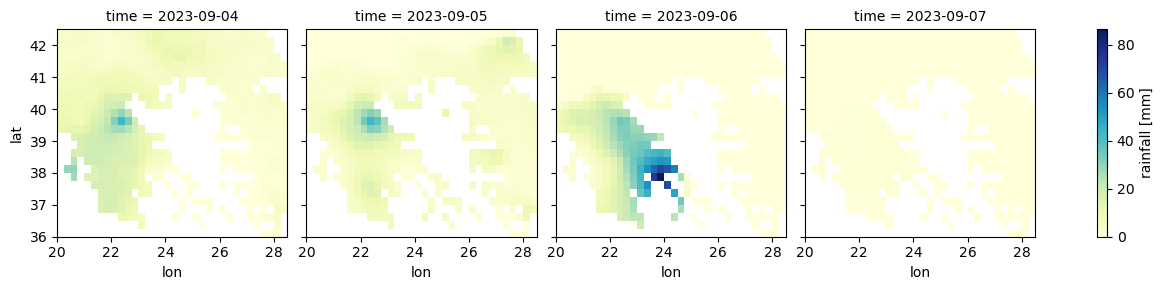

In [34]:
xn, xx, yn, yx = [20,28.5,36,42.5]
eobs.sel(lon = slice(xn, xx), lat = slice(yn, yx), time = slice("2023-09-04", "2023-09-07")).plot(col = "time", cmap = "YlGnBu")

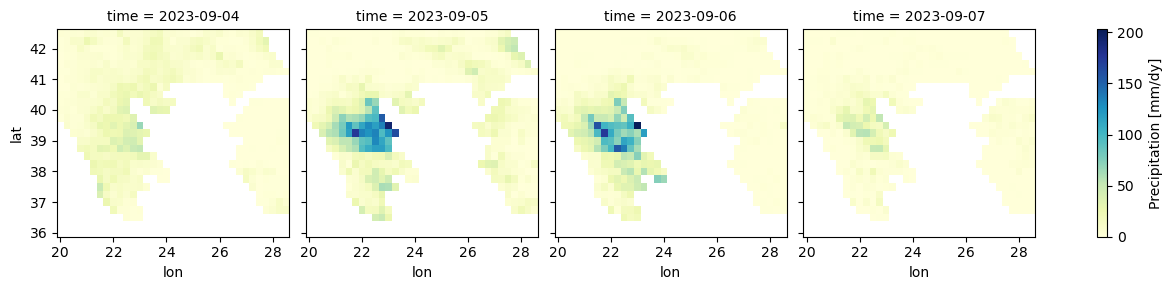

In [35]:
era5.sel(lon = slice(xn, xx), lat = slice(yn, yx), time = slice("2023-09-04", "2023-09-07")).plot(col = "time", cmap = "YlGnBu")

In [2]:
# define regions of interest
boxes = {"greece" : [21,24,38.5,40.5], "bulgaria" : [27,28,41.5,42.5], "libya" : [20,23,32,33], "spain" : [-5.5,-3.5,39,41]}

In [58]:
mswep = xr.open_dataset("data/mswep_daily_libya.nc").precipitation
era5 = pd.read_csv("ts/libya_rx1day_era5.csv", index_col = "year", parse_dates = ["year"])

In [48]:
mswep.sel(time = "2023-09-10").plot(cmap = "YlGnBu", subplot_kws = {"projection" : cproj})

for ax in plt.gcf().axes[:-1]:
    ax.gridlines(draw_labels = ["bottom", "left"])
    ax.coastlines()

<AxesSubplot: xlabel='year', ylabel='precipitation [mm d-1]'>

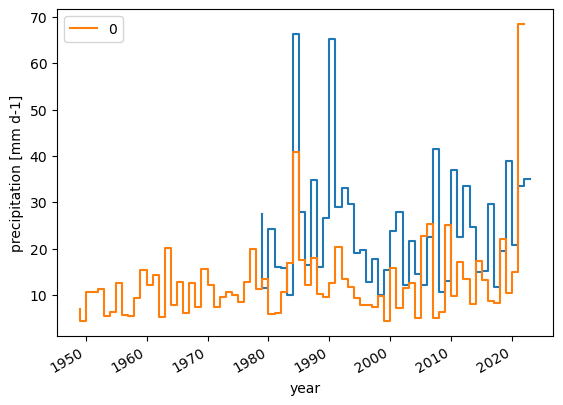

In [60]:
mswep.sel(lon = slice(20.5, 22)).mean(["lat", "lon"]).resample(time = "AS-JAN").max().plot(drawstyle = "steps")
era5.plot(ax = plt.gca(), drawstyle = "steps")

## **Thessaly**

In [11]:
sf_org = gpd.read_file("sf_grc_adm1/").set_index("NAMA1").loc[["Thessalias Stereas Elladas"]] # downloaded by me
sf = gpd.read_file("sf_thessaly_pe/") # provided by Vassiliki Kotroni

<AxesSubplot: >

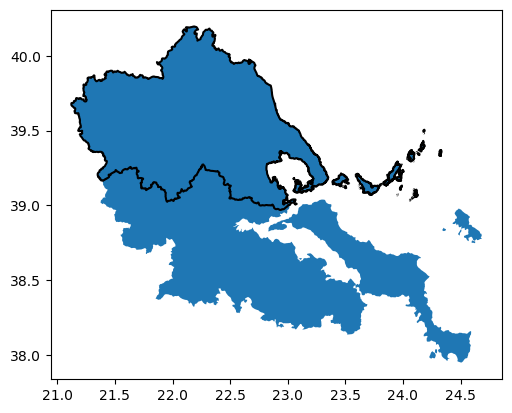

In [12]:
sf_org.plot()
sf.boundary.plot(ax = plt.gca(), color = "k")

In [14]:
era5 = xr.open_dataset("data/era5_tp_daily_eu_extended_-20-40E_30-60N.nc").tp
rm = regionmask.mask_geopandas(sf, era5.lon, era5.lat)

era5_thessaly = era5.where(rm == 0).dropna("lon", "all").dropna("lat", "all")
era5_thessaly.to_netcdf("data/era5_thessaly.nc")

In [49]:
mswep = xr.open_dataset("data/mswep_daily_sr.nc")
rm_mswep = regionmask.mask_geopandas(sf, mswep.lon, mswep.lat)

mswep_thessaly = mswep.where(rm_mswep == 0).dropna("lon", "all").dropna("lat", "all")
mswep_thessaly.to_netcdf("data/mswep_thessaly.nc")

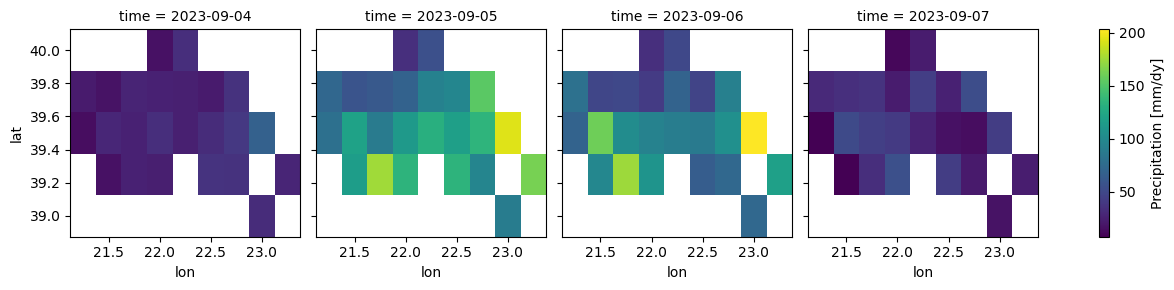

In [19]:
era5_thessaly.sel(time = slice("2023-09-04", "2023-09-07")).plot(col = "time")

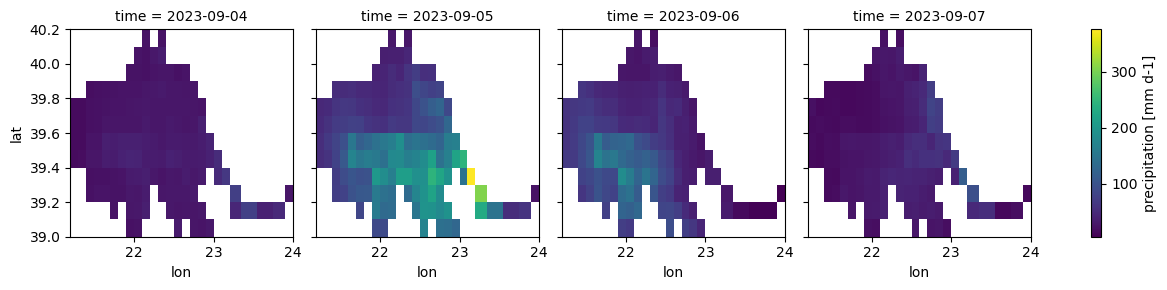

In [20]:
mswep_thessaly.sel(time = slice("2023-09-04", "2023-09-07")).precipitation.plot(col = "time")

In [50]:
ms_rxnday = [mswep_thessaly.precipitation.mean(["lat", "lon"]).rolling(time = nd).sum().resample(time = "AS-JUL").max().rename("tp") for nd in [2,4]]
era_rxnday = [era5_thessaly.mean(["lat", "lon"]).rolling(time = nd).sum().resample(time = "AS-JUL").max() for nd in [2,4]]

In [51]:
ms_rxnday, era_rxnday = [[da.assign_coords(time = da.time.dt.year).rename(time = "year") for da in rxnday] for rxnday in [ms_rxnday, era_rxnday]]

In [52]:
ms_rxnday[0].to_dataframe().to_csv("data/thessaly_rx2day_mswep.csv")
ms_rxnday[1].to_dataframe().to_csv("data/thessaly_rx4day_mswep.csv")

era_rxnday[0].to_dataframe().to_csv("data/thessaly_rx2day_era5.csv")
era_rxnday[1].to_dataframe().to_csv("data/thessaly_rx4day_era5.csv")


In [33]:
mswep_ts, era5_ts = [da.mean(["lat", "lon"]) for da in [mswep_thessaly.precipitation, era5_thessaly]]

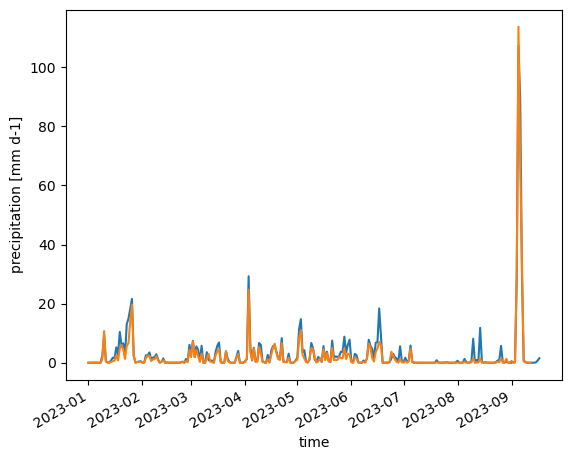

In [34]:
era5_ts.sel(time = "2023").plot()
mswep_ts.sel(time = "2023").plot()

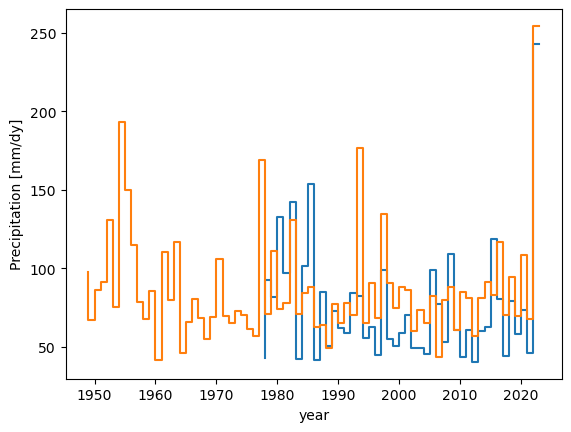

In [37]:
ms_rxnday[1].plot(drawstyle = "steps")
era_rxnday[1].plot(drawstyle = "steps")

## **Station data**

In [137]:
xn, xx, yn, yx = [21,24,38.5,40.5]

stn = pd.read_csv("data/Daniel_THessaly.csv", sep = " " )
mswep = xr.open_dataset("data/mswep_daily_greece.nc").precipitation.sel(time = slice("2023-09-04", "2023-09-07"))
era5 = wrap_lon(xr.open_dataset("data/era5_tp_daily_eu_extended_-20-40E_30-60N.nc")).tp.sel(lon = slice(xn, xx), lat = slice(yn, yx), time = slice("2023-09-04", "2023-09-07"))

lsm = wrap_lon(xr.open_dataset("../00_WWA_project_folder/live/data/era5_lsm_025.nc")).lsm.squeeze(drop = True).rename(latitude = "lat", longitude = "lon").sel(lon = slice(xn, xx), lat = slice(yn, yx))

era5 = era5.where(lsm >= 0.5)

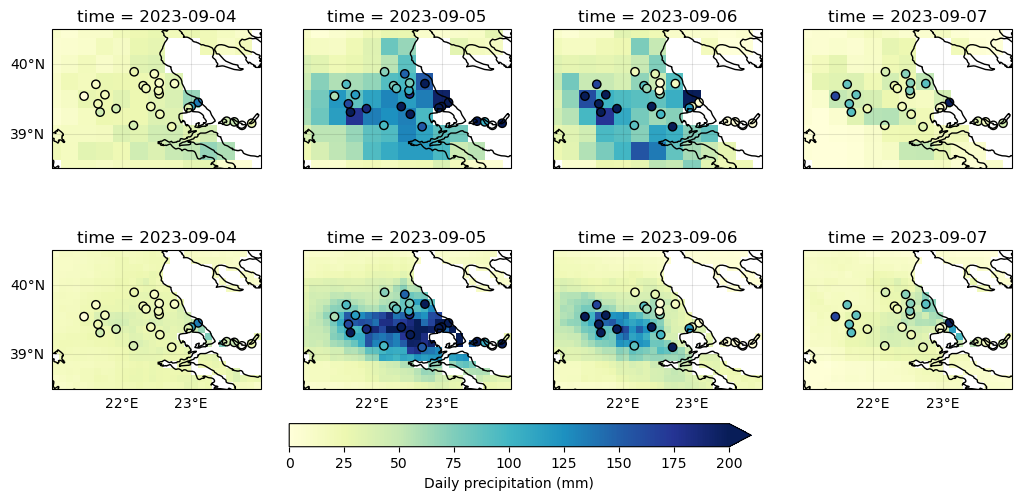

In [142]:
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize = (16,6), dpi = 100, subplot_kw = {"projection" : cproj, "extent" : [xn, xx, yn, yx]})
plt.subplots_adjust(left = 0.3)
plot_kwargs = {"cmap" : "YlGnBu", "add_colorbar" : False, "vmin" : 0, "vmax" : 200}

for i in range(4):
    
    era5.isel(time = i).plot(ax = axs[0,i], **plot_kwargs)
    cbar = mswep.isel(time = i).plot(ax = axs[1,i], **plot_kwargs)
    
    for ax in axs[:,i]:
        cnm = [cnm for cnm in stn.columns if "Sep" in cnm][i]
        ax.scatter(stn.LON, stn.LAT, marker = "o", c = stn[cnm], ec = "k", cmap = "YlGnBu", vmin = plot_kwargs["vmin"], vmax = plot_kwargs["vmax"])
    
for ax in fig.axes:
    ax.coastlines()
    ax.gridlines(color = "k", alpha = 0.1, draw_labels = False, xlocs = range(20,25), ylocs = range(38,41))
    
for ax in axs[:,0]: ax.gridlines(color = "k", alpha = 0, draw_labels = ["left"], ylocs = range(38,41))
for ax in axs[-1,:]: ax.gridlines(color = "k", alpha = 0, draw_labels = ["bottom"], xlocs = range(20,25))
    
axs[0,0].set_ylabel("ERA5", transform = cproj)
axs[1,0].set_ylabel("MSWEP")

    
plt.colorbar(cbar, ax = axs, location = "bottom", fraction = 0.05, extend = "max", label = "Daily precipitation (mm)", pad = 0.075)
plt.savefig("fig/thessaly-with-stations.png")